In [8]:
import pandas as pd
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", 50)

import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import datetime as dt
import glob
import os

In [9]:
# importing json files

dfs=[]
for file in glob.glob("data/*.json"):
    dataframe = pd.read_json(file)['posts']
    # flatten the structure
    dataframe = pd.json_normalize(dataframe)
    # insert file names
    dataframe['file_name'] = os.path.basename(file)
    dfs.append(dataframe)

# concatenate all data and drop repeated entries
df=pd.concat(dfs).drop_duplicates(subset='uuid', keep='last')

df.head()

,preview,is_locked,tweet_id,sticky_comment,removal_source,link,author_flair_class,is_video_mp4,is_removed,title,...,link_metadata.twitter.parentTweet.quotedTweet.video,link_metadata.twitter.poll.options,link_metadata.twitter.poll.votes,link_metadata.twitter.poll.endTime,link_metadata.twitter.poll.winningPercentage,link_metadata.twitter.parentTweet.linkEmbed.image,link_metadata.twitter.parentTweet.linkEmbed.domain,link_metadata.twitter.parentTweet.linkEmbed.description,link_metadata.twitter.parentTweet.linkEmbed.title,link_metadata.twitter.parentTweet.linkEmbed.url
2,https://media.patriots.win/preview/17txVxLh4h.png,False,,0,,https://media.scored.co/post/Te1QiisbCGPR.png,,False,False,🚽 Only 17% of Americans View Radical-Left Tim Walz Positively 💩,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://media.patriots.win/preview/17txVxL8ye.png,False,1820837157554041212,0,,https://twitter.com/LauraLoomer/status/1820837157554041212,,False,False,Gwen Walz is just as crazy left as her husband 🤪,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://media.patriots.win/preview/17txVxKasX.png,False,,0,,https://thepostmillennial.com/felony-charges-against-teen-who-rode-scooter-left-skid-marks-on-spokane-pride-crosswalk-dismissed?utm_campaign=64466,,False,False,"Felony charges against teen who rode scooter, left skid marks on Spokane Pride crosswalk dismissed",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,https://media.patriots.win/preview/17txVxLhCw.png,False,,0,,https://media.patriots.win/post/cS4ZO2P9yD7f.jpeg,,False,False,Donald Trump: 17 million primary votes Kamala Harris: 0 primary votes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,https://media.patriots.win/preview/17txVxKs3q.png,False,,0,,https://media.scored.co/post/Xej4O0IbECnu.jpeg,,False,False,Break the Cycle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# slicing out only relevant columns 

selected_columns = [
    'file_name',
    'uuid', 
    'title',
    'content',
    'post_flair_text',
    'author',
    'author_flair_text',
    'created',
    'comments',
    'score_up',
    'preview',
    'link',
    'domain',
    'is_image',
    'is_video',
    'video_link'
    ]	
df = df[selected_columns]

# Replace empty cell with Nan
dataframe = dataframe.replace(r'^\s*$', np.nan, regex=True)

# Format datetime
df['created'] = pd.to_datetime(df.created, unit='ms').dt.tz_localize('US/Eastern')
# crate a column storing "date" 
df['created_date'] = df['created'].dt.date
df['created_date'] = pd.to_datetime(df['created_date'])


# Fix empty or ill-formed domain column
selfpost_mask = df.domain.str.match('^$')
df.loc[selfpost_mask, 'domain'] = 'self_post'

df.created_date.value_counts().sort_index()

/var/folders/f2/xbsrplkj23z71l_fw6890_hr0000gn/T/ipykernel_57757/4060232883.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe = dataframe.replace(r'^\s*$', np.nan, regex=True)


created_date
2024-07-21     31
2024-07-22    500
2024-07-23    615
2024-07-24    585
2024-07-25    631
2024-07-26    596
2024-07-27    611
2024-07-28    619
2024-07-29    647
2024-07-30    585
2024-07-31    628
2024-08-01    591
2024-08-02    615
2024-08-03    638
2024-08-04    631
2024-08-05    651
2024-08-06    596
2024-08-07    601
2024-08-08    609
2024-08-09    599
2024-08-10    584
2024-08-11    630
2024-08-12    611
2024-08-13    656
2024-08-14    632
2024-08-15    605
2024-08-16    609
2024-08-17    611
2024-08-18    587
2024-08-19    637
2024-08-20    608
2024-08-21    619
2024-08-22    616
2024-08-23    618
2024-08-24    588
2024-08-25    595
2024-08-26    607
2024-08-27    614
2024-08-28    601
2024-08-29    594
2024-08-30    619
2024-08-31    589
2024-09-01    588
2024-09-02    605
2024-09-03    614
2024-09-04    625
2024-09-05    244
Name: count, dtype: int64

In [11]:
df.head()

,file_name,uuid,title,content,post_flair_text,author,author_flair_text,created,comments,score_up,preview,link,domain,is_image,is_video,video_link,created_date
2,20240806-141246_page6.json,17txVxLh4h,🚽 Only 17% of Americans View Radical-Left Tim Walz Positively 💩,,THE BADDIES,MythArcana,,2024-08-06 16:16:27.731000-04:00,9,74,https://media.patriots.win/preview/17txVxLh4h.png,https://media.scored.co/post/Te1QiisbCGPR.png,media.scored.co,True,False,,2024-08-06
3,20240806-141246_page6.json,17txVxL8ye,Gwen Walz is just as crazy left as her husband 🤪,,,AZDesertRat,,2024-08-06 15:10:45.696000-04:00,10,88,https://media.patriots.win/preview/17txVxL8ye.png,https://twitter.com/LauraLoomer/status/1820837157554041212,twitter.com,False,False,,2024-08-06
4,20240806-141246_page6.json,17txVxKasX,"Felony charges against teen who rode scooter, left skid marks on Spokane Pride crosswalk dismissed",,,Sea_Still,,2024-08-06 14:11:14.820000-04:00,10,105,https://media.patriots.win/preview/17txVxKasX.png,https://thepostmillennial.com/felony-charges-against-teen-who-rode-scooter-left-skid-marks-on-spokane-pride-crosswalk-dismissed?utm_campaign=64466,thepostmillennial.com,False,False,,2024-08-06
5,20240806-141246_page6.json,17txVxLhCw,Donald Trump: 17 million primary votes Kamala Harris: 0 primary votes,,,biden_didnt_win,,2024-08-06 16:21:04.849000-04:00,3,69,https://media.patriots.win/preview/17txVxLhCw.png,https://media.patriots.win/post/cS4ZO2P9yD7f.jpeg,media.patriots.win,True,False,,2024-08-06
6,20240806-141246_page6.json,17txVxKs3q,Break the Cycle,,,foxhound,,2024-08-06 14:50:11.440000-04:00,3,92,https://media.patriots.win/preview/17txVxKs3q.png,https://media.scored.co/post/Xej4O0IbECnu.jpeg,media.scored.co,True,False,,2024-08-06


In [12]:
# Unpack shortened domains
import requests
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
import tldextract

common_shorts = [
    "adf.ly", "adfoc.us", "amzn.to", "atominik.com", "ay.gy", "b.link", "bhpho.to", "bit.ly", "bit.do", 
    "bn.gy", "branch.io", "buff.ly", "ceesty.com", "chollo.to", "cli.re", "cli.fm", "cutt.ly", "cutt.us", 
    "db.tt", "f.ls", "fa.by", "fb.me", "flip.it", "fumacrom.com", "git.io", "geni.us", "goo.gl", "gns.io", 
    "hmm.rs", "ht.ly", "hyperurl.co", "ity.im", "intamema.com", "is.gd", "j.gs", "j.mp", "kutt.it", "ldn.im", 
    "linklyhq.com", "microify.com", "mzl.la", "nmc.sg", "nowlinks.net", "ow.ly", "prf.hn", "plu.sh", "q.gs", 
    "qr.ae", "qr.net", "rebrand.ly", "rb.gy", "rlu.ru", "rotf.lol", "s.coop", "s.id", "sh.st", "soo.gd", 
    "shortcm.xyz", "short.gy", "shortcm.xyz", "shorturl.at", "smu.sg", "smq.tc", "snip.ly", "snipr.com", 
    "snipurl.com", "snurl.com", "split.to", "surl.li", "t.co", "t.ly", "t2m.io", "tiny.cc", "tiny.pl", 
    "tinyium.com", "tinyurl.com", "tiny.one", "tny.im", "tny.sh", "tr.im", "trib.al", "u.to", "v.gd", 
    "virg.in", "vzturl.com", "waa.ai", "washex.am", "x.co", "y2u.be", "yourwish.es", "zpr.io", "1url.com", 
    "2.gp", "3.ly", "4sq.com", "6url.com", "7.ly", "9.bb", "amp.gs", "atz.bz", "binged.it",
    "budurl.com", "cort.as", "decenturl.com", "dft.ba", "goo.gl", "inbound.org", "itsh.bo", "mcaf.ee",
    "n.pr", "nyti.ms", "on.fb.me", "prsm.tc", "redd.it", "tnw.to", "twt.fi", "u.nu", "virl.io", "wapo.st",
    "wp.me", "xrl.us",  "zurl.ws", "dlvr.it", 'msft.it', "lnkd.in ", 'spr.ly', 'rebelne.ws', 'scroll.in', 'ab.co',
    'hubs.li', 'bbc.in', 'nature.ly', 'cbsn.ws' , 'brnw.ch', 'youtu.be'
                ]

# Set up a Requests session with retries
session = requests.Session()
headers = {
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.5',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'DNT': '1',
    'referer': 'https://www.google.com/'
}

headers = {
        'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
        'referer':'https://google.com',
        'DNT':'1'
    }

# session.headers.update(headers)
retries = Retry(total=4, backoff_factor=1, status_forcelist=[502, 503, 504])
session.mount('http://', HTTPAdapter(max_retries=retries))
session.mount('https://', HTTPAdapter(max_retries=retries))

def check_connection(host='http://www.google.com'):
    try:
        session.get(host, timeout=1)
        return True
    except (requests.ConnectionError, requests.Timeout):
        return False

def wait_for_connection(interval=30, max_attempts=10):
    attempts = 0
    while not check_connection() and attempts < max_attempts:
        time.sleep(interval)
        attempts += 1
    return attempts < max_attempts

def resolve_url_head(short_url):
    if not wait_for_connection():
        raise ConnectionError("Internet connection could not be re-established.")
    try:
        response = requests.head(short_url, allow_redirects=True, timeout=1)
        return response.url if response.status_code == 200 else short_url
    except requests.RequestException:
        return short_url
    
def resolve_url_get(short_url):
    if not wait_for_connection():
        raise ConnectionError("Internet connection could not be re-established.")
    try:
        response = session.get(short_url, allow_redirects=True, timeout=5)
        return response.url if response.status_code == 200 else short_url
    except requests.RequestException:
        return short_url
    if not wait_for_connection():
        raise ConnectionError("Internet connection could not be re-established.")
    try:
        response = session.get(url=shortend_url, allow_redirects=True, timeout=1)        
   
    except requests.RequestException:
        return None    
    
df['domain'] = df['domain'].apply(lambda x: tldextract.extract(x).domain + "." + tldextract.extract(x).suffix if x != 'self_post' else 'self_post')
short_mask = df['domain'].isin(common_shorts)
df.loc[short_mask, 'domain'] = df.loc[short_mask, 'link'].apply(lambda x: resolve_url_get(x)).apply(lambda x: tldextract.extract(x).domain + "." + tldextract.extract(x).suffix)

In [13]:
# The top 10 most-shared domains on The Ronald's landing page
df.domain.value_counts(normalize=True).head(10)

domain
twitter.com             0.364782
scored.co               0.263861
patriots.win            0.160087
self_post               0.033881
thegatewaypundit.com    0.020408
youtube.com             0.016724
videy.co                0.009969
rumble.com              0.009247
breitbart.com           0.008813
zerohedge.com           0.007694
Name: proportion, dtype: float64

In [14]:
# Drop posts from 2024-07-21
df = df[df['created_date'] != '2024-07-21']

# Keep only the top 500 posts by "score_up" from each date so that the playing field is more leveled
df = df.groupby('created_date').apply(lambda x: x.nlargest(500, 'score_up')).reset_index(drop=True)

/var/folders/f2/xbsrplkj23z71l_fw6890_hr0000gn/T/ipykernel_57757/1070751727.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('created_date').apply(lambda x: x.nlargest(500, 'score_up')).reset_index(drop=True)


In [15]:
# Extract twitter handles 
df[df.domain =='twitter.com'].link.str.split('/').str[3].str.lower()
df.loc[df.domain == 'twitter.com', 'twitter_handle'] = df[df.domain == 'twitter.com'].link.str.split('/').str[3].str.lower()
df['twitter_handle'].fillna(np.nan, inplace=True)

# Top twitter handles mentioned
df.value_counts('twitter_handle', ascending=False).head(10)

/var/folders/f2/xbsrplkj23z71l_fw6890_hr0000gn/T/ipykernel_57757/3006735851.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['twitter_handle'].fillna(np.nan, inplace=True)


twitter_handle
elonmusk        312
behizytweets    298
endwokeness     201
libsoftiktok    164
bennyjohnson    121
catturd2        120
dc_draino       115
immeme0         110
trumpwarroom    110
nicksortor      110
Name: count, dtype: int64

In [16]:
df.created

0       2024-07-22 21:37:08.297000-04:00
1       2024-07-22 14:07:56.522000-04:00
2       2024-07-22 02:27:55.264000-04:00
3       2024-07-22 13:41:37.980000-04:00
4       2024-07-22 01:18:06.352000-04:00
                      ...               
22739   2024-09-05 11:25:36.891000-04:00
22740   2024-09-05 11:24:06.813000-04:00
22741   2024-09-05 11:31:29.784000-04:00
22742   2024-09-05 11:25:04.077000-04:00
22743   2024-09-05 12:04:47.592000-04:00
Name: created, Length: 22744, dtype: datetime64[ns, US/Eastern]

In [17]:
# A function that returns the top posts in interactive format
    
def top_posts_lastNdays(num, Ndays, save_table=False):
    end_date = datetime.datetime.now()
    start_date = end_date - datetime.timedelta(days=Ndays)
    top_posts = df[df.created_date >= start_date].nlargest(num,'score_up')
    top_posts['post_link'] = "https://patriots.win/p/" + top_posts['uuid']
    top_posts['title'] = top_posts.apply(lambda row: f'<a href="{row["post_link"]}">{row["title"]}</a>', axis=1)
    top_posts = top_posts[['title', 
                           'score_up', 
                           'comments', 
                           'author'
                           ]]
    
    
    top_posts = top_posts.reset_index().drop(columns='index')
    top_posts.index = np.arange(1, len(top_posts)+1)

    if save_table:
        html_content = top_posts.to_html(render_links=True, 
                                         justify='center', 
                                         escape=False,
                                         classes='table table-striped table-hover', 
                                         table_id='my_table')
        
        with open(f'viz/most_popular_posts_in_the_last_day(s).html', "w") as html_file:
            html_file.write(f"""
                <html>
                <head>
                <link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.10.21/css/jquery.dataTables.css">
                <script type="text/javascript" charset="utf8" src="https://code.jquery.com/jquery-3.5.1.js"></script>
                <script type="text/javascript" charset="utf8" src="https://cdn.datatables.net/1.10.21/js/jquery.dataTables.js"></script>
                <script>
                $(document).ready( function () {{
                    $('#my_table').DataTable();
                }} );
                </script>
                </head>
                <body>
                {html_content}
                </body>
                </html>
            """)
                                         
    return top_posts


top_posts_lastNdays(num=20, Ndays=1, save_table=True)

,title,score_up,comments,author
1,"<a href=""https://patriots.win/p/1994kCXhbT"">Elon Musk: I have never been materially active in politics before, but this time I think civilization as we know it is on the line. \r\n\r\nIf we want to preserve freedom and a meritocracy in America, then Trump must win.</a>",2146,152,I-am-Orlando
2,"<a href=""https://patriots.win/p/1994kDdtGY"">Kevin Sorbo: The media forgot about Biden so fast you’d think... 🔥</a>",1758,58,I-am-Orlando
3,"<a href=""https://patriots.win/p/1994kCXQ9a"">BREAKING: FBI says alleged Apalachee school shooter Colt Gray was investigated last year for making online threats to commit a school shooting.\n\n""There was no probable cause for arrest.""</a>",1538,149,hocuspocusfocusjeep
4,"<a href=""https://patriots.win/p/1994kCXQ9d"">Every. Single. Time.</a>",1517,57,no_comment
5,"<a href=""https://patriots.win/p/1994kCXymg"">“THERE IS NO CRIME.” I DID NOTHING WRONG. WITCH HUNT. RELEASE THE GAG ORDER!!!</a>",1415,36,Trump_Is_My_Daddy
6,"<a href=""https://patriots.win/p/1994kDeAeH"">Trump just formally accepted the endorsement from Tim Walz's entire family. “I was so honored today. His brother endorsed me.. and his whole family.""</a>",1257,66,no_comment
7,"<a href=""https://patriots.win/p/1994kDeARm"">Wow. MASSIVE turnout for Tucker Carlson's Live show in Phoenix, AZ. People are more engaged now than ever. </a>",1203,81,SALTYinSeattle
8,"<a href=""https://patriots.win/p/1994kCXh8b"">Illegal Alien Arrested After Attacking Tennessee Man with Pickaxe – Victim Found “With Pickaxe Embedded in His Skull”</a>",1113,69,rdvs34283
9,"<a href=""https://patriots.win/p/1994kCXyaI"">Troon shooter questioned by FBI last year over threats. </a>",1062,90,Pederella
10,"<a href=""https://patriots.win/p/1994kCXhTC"">LIVE: Trump Town Hall With Sean Hannity </a>",759,126,I-am-Orlando


In [18]:
def top_authors_lastNdays(num, Ndays):
    end_date = datetime.datetime.now()
    start_date = end_date - datetime.timedelta(days=Ndays)

    return df[df.created_date >=  start_date].author.value_counts().head(num)

top_authors_lastNdays(num=10, Ndays=1)

author
rdvs34283              25
kinbergfan             19
icehole3               15
TheOne1                 7
JTIM                    6
SirThinksAlot           6
I-am-Orlando            6
FBJ_WoodChipper         5
kek_saved_the_world     4
perma-maga              4
Name: count, dtype: int64

In [19]:
import spacy
import nltk
nltk.download('wordnet')
from nltk import bigrams, trigrams
nlp = spacy.load('en_core_web_lg')
stopwords = list(nlp.Defaults.stop_words) 
stopwords.extend(["ago", 'old'])

import contractions
import emoji
import re



def clean_it_all_up (text, extra_stops):
    text = emoji.replace_emoji(text)
    text = contractions.fix(text)
    text = re.sub(r'\W+', ' ', text)
    doc = nlp(text)
    lemmatized_tokens = []
    
    for token in doc:
        if (
            token.text.lower() not in stopwords 
            and (extra_stops is None or token.text.lower() not in extra_stops) 
            # and token.pos_ in {'NOUN', 'PROPN', 'VERB', 'ADJ'} 
            # and token.ent_type_ not in {'GPE', 'LOC'}
            and token.pos_ not in {"AUX",
                                   "ADP",
                                   "CONJ", 
                                   "CCONJ", 
                                   "DET", 
                                   "INTJ", 
                                   "PART", 
                                   "PUNCT",
                                   "SCONJ", 
                                   "SYM", 
                                   "X", 
                                   "SPACE"}
        ):
          
            
            lemmatized_tokens.append(token.lemma_.lower())
            
    return " ".join(lemmatized_tokens)   


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/keenansmacbookairm3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
def date_selection(start_date, end_date):
    start_date = datetime.datetime.strptime(start_date, "%Y-%m-%d")
    end_date = end_date = datetime.datetime.strptime(end_date, "%Y-%m-%d")

    date_list = []
    current_date = start_date
    date_list.append(current_date.strftime('%Y-%m-%d'))

    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=1)
        next_date = next_date
        if next_date >= end_date:
            next_date = end_date
        date_list.append(next_date.strftime('%Y-%m-%d'))
        current_date = next_date

    return date_list


In [21]:
def ngram_generator(dataframe, num, start_date, end_date, extra_stops, top_n=None):
    
    date_list = date_selection(start_date, end_date)

    cleaned_tokens = ' '.join(dataframe[dataframe.created_date.isin(date_list)]['title'].apply(lambda x: clean_it_all_up(x, extra_stops)).tolist())

    if num == 1:
        ngram = pd.Series(cleaned_tokens.split()).value_counts()
    elif num == 2:
        ngram = pd.Series(list(bigrams(cleaned_tokens.split()))).value_counts()
    elif num == 3:
        ngram = pd.Series(list(trigrams(cleaned_tokens.split()))).value_counts()
    else:
        raise ValueError('Invalid number. Must choose between 1, 2, or 3.')
    
    ngram = ngram[ngram > 1].head(top_n)
    return ngram


In [22]:
# Function of returning top ngrams from the past 24 hours

def ngram_generator_24hrs(dataframe, num, extra_stops, top_n=None):
    end_date = datetime.datetime.now()
    start_date = end_date - datetime.timedelta(days=1)
    
    start_date = start_date.strftime("%Y-%m-%d")
    end_date = end_date.strftime("%Y-%m-%d")
    
    return ngram_generator(dataframe, num, start_date, end_date, extra_stops, top_n)

In [23]:
dataframe = df
num = 2
top_n = 50
extra_stops=['trump']

top_50_bigrams_24hours = ngram_generator_24hrs(dataframe= dataframe, num=num, top_n=top_n, extra_stops=extra_stops )
top_50_bigrams_24hours

/var/folders/f2/xbsrplkj23z71l_fw6890_hr0000gn/T/ipykernel_57757/2951235605.py:5: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  cleaned_tokens = ' '.join(dataframe[dataframe.created_date.isin(date_list)]['title'].apply(lambda x: clean_it_all_up(x, extra_stops)).tolist())


(kamala, harris)            39
(tim, walz)                 20
(secret, service)           10
(biden, harris)              9
(fani, willis)               8
(paul, harrell)              8
(illegal, alien)             7
(2024, election)             7
(liz, cheney)                7
(social, medium)             6
(high, school)               6
(school, shooter)            6
(rfk, jr)                    6
(elon, musk)                 6
(united, states)             6
(new, york)                  6
(assassination, attempt)     6
(suspend, license)           5
(supreme, court)             5
(election, interference)     5
(chinese, spy)               4
(malik, obama)               4
(white, house)               4
(republican, vote)           4
(covid, 19)                  4
(nathan, wade)               4
(venezuelan, gang)           4
(fake, news)                 4
(taylor, swift)              4
(rip, paul)                  4
(whistleblower, tell)        4
(tax, dollar)                4
(hour, o

In [24]:
top_50_bigrams_24hours_df = pd.DataFrame(top_50_bigrams_24hours).reset_index()

top_50_bigrams_24hours_df.index = np.arange(1, len(top_50_bigrams_24hours_df)+1)

top_50_bigrams_24hours_df.rename(columns={"index":'bigrams', 'count':'frequncy'}, inplace=True)

top_50_bigrams_24hours_df

,bigrams,frequncy
1,"(kamala, harris)",39
2,"(tim, walz)",20
3,"(secret, service)",10
4,"(biden, harris)",9
5,"(fani, willis)",8
6,"(paul, harrell)",8
7,"(illegal, alien)",7
8,"(2024, election)",7
9,"(liz, cheney)",7
10,"(social, medium)",6


In [25]:
def save_interactive_table(dataframe, save_filename):
    html_content = dataframe.to_html(render_links=True, 
                                         justify='center', 
                                         escape=False,
                                         classes='table table-striped table-hover', 
                                         table_id='my_table')
    with open(f'viz/{save_filename}.html', "w") as html_file:
         html_file.write(f"""
                <html>
                <head>
                <link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.10.21/css/jquery.dataTables.css">
                <script type="text/javascript" charset="utf8" src="https://code.jquery.com/jquery-3.5.1.js"></script>
                <script type="text/javascript" charset="utf8" src="https://cdn.datatables.net/1.10.21/js/jquery.dataTables.js"></script>
                <script>
                $(document).ready( function () {{
                    $('#my_table').DataTable();
                }} );
                </script>
                </head>
                <body>
                {html_content}
                </body>
                </html>
            """)
         
         return html_content

In [26]:
html_content = save_interactive_table(top_50_bigrams_24hours_df, 'top_bigrams_24hrs_table')

html_content

'<table border="1" class="dataframe table table-striped table-hover" id="my_table">\n  <thead>\n    <tr style="text-align: center;">\n      <th></th>\n      <th>bigrams</th>\n      <th>frequncy</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>(kamala, harris)</td>\n      <td>39</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>(tim, walz)</td>\n      <td>20</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>(secret, service)</td>\n      <td>10</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>(biden, harris)</td>\n      <td>9</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>(fani, willis)</td>\n      <td>8</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>(paul, harrell)</td>\n      <td>8</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>(illegal, alien)</td>\n      <td>7</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>(2024, election)</td>\n      <td>7</td>\n    </tr>\n    <tr>\n      <th>9</th>\n      <td>(liz, cheney)

In [27]:
# A function of returning top ngrams from the past 7 days

def ngram_generator_7days(dataframe, num, extra_stops, top_n=None):
    end_date = datetime.datetime.now()
    start_date = end_date - datetime.timedelta(days=7)
    
    start_date = start_date.strftime("%Y-%m-%d")
    end_date = end_date.strftime("%Y-%m-%d")
    
    return ngram_generator(dataframe, num, start_date, end_date, extra_stops, top_n)

In [28]:
# A function to return a wordcloud chart covering a specific period of dates
from wordcloud import WordCloud

def ngram_cloud(dataframe, num, start_date, end_date, extra_stops, top_n=None):
    ngram = ngram_generator(dataframe, num, start_date, end_date, extra_stops, top_n)
    words_cloud = pd.DataFrame(ngram, columns=['count']).reset_index().rename(columns={'index': 'phrases'})
    words_cloud['phrases'] = words_cloud['phrases'].apply(lambda x: ', '.join(x) if isinstance(x,tuple) else x)
    words_cloud['phrases'] = words_cloud['phrases'].str.replace(',', '')
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='gist_stern').\
    generate_from_frequencies(words_cloud.set_index('phrases')['count'].to_dict())
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

In [29]:
f"{datetime.datetime.now():%Y-%m-%d %H:%M}"


'2024-09-05 10:25'

In [30]:
# A function to return a wordcloud chart covering ONLY the past 24 hours

def ngram_24hrs_cloud(dataframe, num, save_viz, extra_stops, set_title=False, top_n=None):
    ngram = ngram_generator_24hrs(dataframe, num, extra_stops, top_n)
    words_cloud = pd.DataFrame(ngram, columns=['count']).reset_index().rename(columns={'index': 'phrases'})
    words_cloud['phrases'] = words_cloud['phrases'].apply(lambda x: ', '.join(x) if isinstance(x,tuple) else x)
    words_cloud['phrases'] = words_cloud['phrases'].str.replace(',', '')
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Dark2').\
    generate_from_frequencies(words_cloud.set_index('phrases')['count'].to_dict())
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, 
               interpolation='nearest',
               aspect="auto"
               )
    
    if set_title:
        plt.title(f"The chart was last updated on {datetime.datetime.now():%Y-%m-%d %H:%M}",
                fontsize=20,
                pad=10,
                style= "italic",
                loc='center'
                )
    plt.axis('off')
    plt.tight_layout()

    if save_viz is not None:
        plt.savefig(f"viz/{save_viz}.jpeg",
                    dpi=600
                    )
        plt.show()
    else:
        plt.show()

/var/folders/f2/xbsrplkj23z71l_fw6890_hr0000gn/T/ipykernel_57757/2951235605.py:5: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  cleaned_tokens = ' '.join(dataframe[dataframe.created_date.isin(date_list)]['title'].apply(lambda x: clean_it_all_up(x, extra_stops)).tolist())


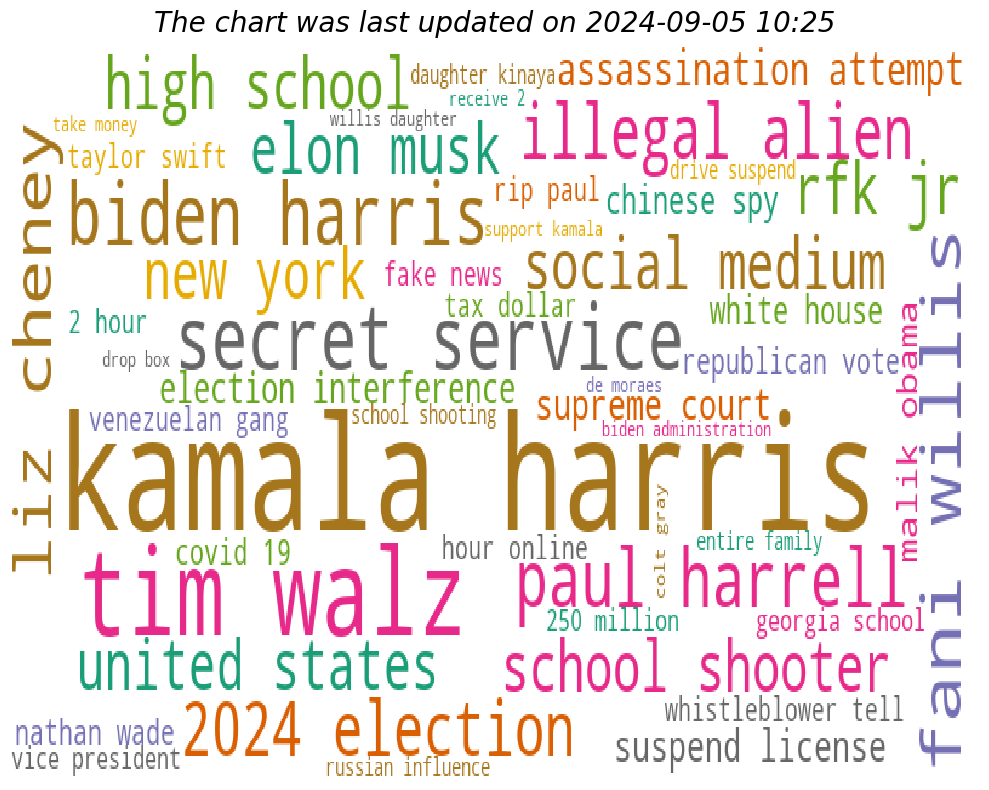

In [31]:
# creating and saving the top 50 bigrams from the last 24 hours
dataframe = df
num = 2
top_n = 50
save_viz = 'bigrams_wordcloud_24hrs'
extra_stops=['trump']
set_title=True
ngram_24hrs_cloud(dataframe = dataframe, num=num, top_n=top_n, save_viz=save_viz, set_title=set_title, extra_stops=extra_stops)



In [32]:
# A function to return a wordcloud chart covering ONLY the past 7 days

def ngram_7days_cloud(dataframe, num, save_viz, extra_stops, top_n=None):
    ngram = ngram_generator_7days(dataframe, num, extra_stops, top_n=None)
    words_cloud = pd.DataFrame(ngram, columns=['count']).reset_index().rename(columns={'index': 'phrases'})
    words_cloud['phrases'] = words_cloud['phrases'].apply(lambda x: ', '.join(x) if isinstance(x,tuple) else x)
    words_cloud['phrases'] = words_cloud['phrases'].str.replace(',', '')
    wordcloud = WordCloud(width=800, height=400, background_color='white').\
    generate_from_frequencies(words_cloud.set_index('phrases')['count'].to_dict())
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Top {top_n} bigrams in the last 7 days",
              fontsize=20,
              pad=25,
              )

    if save_viz is not None:
        plt.savefig(f"viz/{save_viz}.jpeg",
                    dpi=600
                    )
        plt.show()
    else:
        plt.show()

In [33]:
# A summary table of authors based on a given date
def top_acounts(dataframe, start_date, end_date, top_n=None):
    date_list = date_selection(start_date, end_date)
    top_authors = dataframe[dataframe['created_date'].isin(date_list)]['author'].value_counts().reset_index()
    top_authors = top_authors[top_authors['count']>1]
    comments_total = dataframe.groupby('author').comments.sum()
    upvotes_total = dataframe.groupby('author').score_up.sum()
    top_authors =  top_authors.merge(comments_total, on='author').merge(upvotes_total, on='author')
    top_authors = top_authors.rename(columns={
                                        'author': 'top_authors',
                                        'count' : 'posts',
                                        'comments': 'accumulated_comments',
                                        'score_up': 'accumulated_upvotes'
                                        })
    top_authors = top_authors.sort_values('posts', ascending=False).head(top_n)
    return  top_authors

In [34]:
# This function returns the most posted domains from a specific period of time

def top_domains(dataframe, start_date, end_date, top_n=None):
    date_list = date_selection(start_date, end_date)
    top_urls = dataframe[dataframe['created_date'].isin(date_list)]['domain'].value_counts(dropna=False, normalize=True).head(top_n)
    return top_urls

In [35]:
# This function returns the most posted domains from the last 7 days

def top_domains_7days(dataframe, top_n=None):
    end_date = datetime.datetime.now()
    start_date = end_date - datetime.timedelta(days=7)
    
    start_date = start_date.strftime("%Y-%m-%d")
    end_date = end_date.strftime("%Y-%m-%d")

    date_list = date_selection(start_date, end_date)
    top_urls = dataframe[dataframe['created_date'].isin(date_list)]['domain'].value_counts(dropna=False, normalize=True).head(top_n)
    return top_urls

In [36]:
# Popular Twitter accounts on The Ronald

def top_xitter(dataframe, start_date, end_date, top_n=None):
    date_list = date_selection(start_date, end_date)
    xiter_accounts = dataframe[(dataframe.link.str.contains('twitter.com'))& (dataframe['created_date'].isin(date_list))]
    top_xitter = xiter_accounts['link'].str.split('/').str[3].str.lower().value_counts(normalize=False, dropna=False).head(top_n)
    return top_xitter

In [37]:
# A date-based n-gram generator
# useful for making time-series charts 

def new_ngram_generator(dataframe, num, start_date, end_date, extra_stops, top_n=None):
    # Filter dates
    date_list = date_selection(start_date, end_date)
    
    # Filter and process data
    filtered_df = dataframe[dataframe.created_date.isin(date_list)]
    filtered_df['cleaned_title'] = filtered_df['title'].apply(lambda x: clean_it_all_up(x, extra_stops))

    
    ngrams_with_dates = []
    
    for index, row in filtered_df.iterrows():
        tokens = row['cleaned_title'].split()
        if num ==1:
            unigrams_list = list(tokens)
            for unigram in unigrams_list:
                ngrams_with_dates.append((unigram, row['created_date']))
        elif num == 2:
            bigrams_list = list(bigrams(tokens))
            for bigram in bigrams_list:
                ngrams_with_dates.append((bigram, row['created_date']))
        elif num == 3:
            trigrams_list = list(trigrams(tokens))
            for trigram in trigrams_list:
                ngrams_with_dates.append((trigram, row['created_date']))
        else:
            raise ValueError('Invalid number. Must choose between 2 or 3.')
    
    ngram_df = pd.DataFrame(ngrams_with_dates, columns=['ngram', 'date']).head(top_n)
    return ngram_df


In [38]:
def ngram_time_series(dataframe, num, start_date, end_date, save_viz, extra_stops, top_n=None):

    ngrams_df = new_ngram_generator(dataframe, num, start_date, end_date, extra_stops)

    ngrams_df['date'] = pd.to_datetime(ngrams_df['date'])

    ngrams_counts = ngrams_df.groupby([ngrams_df['date'].dt.to_period('d'), 'ngram']).size().reset_index(name='count')

    top_ngrams = ngrams_counts.groupby('ngram')['count'].sum().nlargest(top_n).index

    top_ngrams_counts = ngrams_counts[ngrams_counts['ngram'].isin(top_ngrams)]

    top_ngram_pivot = top_ngrams_counts.pivot(index='date', columns='ngram', values='count').fillna(0)

    top_ngram_pivot.index = top_ngram_pivot.index.to_timestamp()

    plt.figure(figsize=(10, 8))


    top_ngram_plot = sns.lineplot(data=top_ngram_pivot)

    plt.xlabel('')
    plt.ylabel('Mention count')
    plt.title(f'Top bigrams on the landing page of The Ronald between {start_date} and {end_date}')

    plt.xticks(rotation=45) 
    plt.grid(True)

    plt.legend(title='Top Bigrams', bbox_to_anchor=(1.3, 1), loc='upper right')
    
    if save_viz is not None:
        plt.savefig(f"viz/{save_viz}.jpeg",
                    dpi=600
                    )
        plt.show()
    else:
        plt.show()

In [39]:
# create interactive charts with Plotly

import plotly.graph_objs as go

def ngram_time_series_interactive(dataframe, num, start_date, end_date, save_viz, extra_stops, top_n=None):
    ngrams_df = new_ngram_generator(dataframe, num, start_date, end_date, extra_stops)

    ngrams_df['date'] = pd.to_datetime(ngrams_df['date'])

    ngrams_counts = ngrams_df.groupby([ngrams_df['date'].dt.to_period('d'), 'ngram']).size().reset_index(name='count')

    top_ngrams = ngrams_counts.groupby('ngram')['count'].sum().nlargest(top_n).index

    top_ngrams_counts = ngrams_counts[ngrams_counts['ngram'].isin(top_ngrams)]

    top_ngram_pivot = top_ngrams_counts.pivot(index='date', columns='ngram', values='count').fillna(0)

    top_ngram_pivot.index = top_ngram_pivot.index.to_timestamp()

    fig = go.Figure()

    for ngram in top_ngram_pivot.columns:
        fig.add_trace(go.Scatter(
            x=top_ngram_pivot.index, 
            y=top_ngram_pivot[ngram], 
            mode='lines', 
            name=str(ngram)))

    fig.update_layout(
        width=1400,
        height=800,
        title=f'Top bigrams on the landing page of The Ronald between {start_date} and {end_date}',
        xaxis_title='Date',
        yaxis_title='Frequency',
        
        xaxis=dict(tickangle=45),
        legend_title_text='Top Bigrams'
    )

    if save_viz is not None:
        fig.savefig(f"viz/{save_viz}.jpeg",
                    dpi=600
                    )
        fig.show()
    else:
        fig.show()

In [40]:
# This function would only cover the past n days

def ngram_time_last_n_days_interactive(dataframe, num, last_ndays, extra_stops, save_filename, top_n=None):
    end_date = pd.to_datetime(dataframe['created_date'].max())
    start_date = end_date - pd.Timedelta(days=last_ndays)
    start_date = start_date.strftime("%Y-%m-%d")
    end_date = end_date.strftime("%Y-%m-%d")

    ngrams_df = new_ngram_generator(dataframe, num, start_date, end_date, extra_stops)

    # Prepare the data for plotting
    ngrams_df['date'] = pd.to_datetime(ngrams_df['date'])
    ngrams_counts = ngrams_df.groupby([ngrams_df['date'].dt.to_period('d'), 'ngram']).size().reset_index(name='count')
    
    top_ngrams = ngrams_counts.groupby('ngram')['count'].sum().nlargest(top_n).index
    top_ngrams_counts = ngrams_counts[ngrams_counts['ngram'].isin(top_ngrams)]

    top_ngram_pivot = top_ngrams_counts.pivot(index='date', columns='ngram', values='count').fillna(0)
    top_ngram_pivot.index = top_ngram_pivot.index.to_timestamp()

    y_max = top_ngram_pivot.values.max()
    y_range = [0, y_max * 1.1]

    fig = go.Figure()

    # Add traces for each n-gram
    for ngram in top_ngram_pivot.columns:
        fig.add_trace(go.Scatter(
            x=top_ngram_pivot.index, 
            y=top_ngram_pivot[ngram], 
            mode='lines', 
            name=str(ngram)
        ))

    fig.update_traces(line={'width': 5})

    layout = dict(
        width=1000,
        height=800,
        xaxis=dict(
            title='Date',
            tickangle=45
        ),
        yaxis=dict(
            title='Frequency',
            range=y_range
        ),
        legend_title=dict(
            text='<b>Popular Bigrams<br>',
            font=dict(
                family="Courier",
                color='firebrick',
                size=15
            )
        )
    )
    

    if set_title:
        layout['title'] = dict(
            text= f"The chart was last updated on {datetime.datetime.now():%Y-%m-%d %H:%M}",
            font=dict(
                family="Arial",
                size=20
            ),
            pad=dict(t=20)
        )

    fig.update_layout(layout)

    if save_filename:
        fig.write_html(f"viz/{save_filename}.html")
    
    fig.show()

In [41]:
def ngram_time_last_7_days_interactive(dataframe, num, extra_stops, save_filename, set_title=False, top_n=None):
    end_date = pd.to_datetime(dataframe['created_date'].max())
    start_date = end_date - pd.Timedelta(days=7)
    start_date = start_date.strftime("%Y-%m-%d")
    end_date = end_date.strftime("%Y-%m-%d")

    ngrams_df = new_ngram_generator(dataframe, num, start_date, end_date, extra_stops)

    # Prepare the data for plotting
    ngrams_df['date'] = pd.to_datetime(ngrams_df['date'])
    ngrams_counts = ngrams_df.groupby([ngrams_df['date'].dt.to_period('d'), 'ngram']).size().reset_index(name='count')
    
    top_ngrams = ngrams_counts.groupby('ngram')['count'].sum().nlargest(top_n).index
    top_ngrams_counts = ngrams_counts[ngrams_counts['ngram'].isin(top_ngrams)]

    top_ngram_pivot = top_ngrams_counts.pivot(index='date', columns='ngram', values='count').fillna(0)
    top_ngram_pivot.index = top_ngram_pivot.index.to_timestamp()

    y_max = top_ngram_pivot.values.max()
    y_range = [0, y_max * 1.1]

    fig = go.Figure()

    # Add traces for each n-gram
    for ngram in top_ngram_pivot.columns:
        fig.add_trace(go.Scatter(
            x=top_ngram_pivot.index, 
            y=top_ngram_pivot[ngram], 
            mode='lines', 
            name=str(ngram)
        ))

    fig.update_traces(line={'width': 5})

    layout = dict(
        width=1000,
        height=800,
        xaxis=dict(
            title='Date',
            tickangle=45
        ),
        yaxis=dict(
            title='Frequency',
            range=y_range
        ),
        legend_title=dict(
            text='<b>Popular Bigrams<br>',
            font=dict(
                family="Courier",
                color='firebrick',
                size=15
            )
        )
    )

    margin = dict(l=0,
                  r=0,
                  t=0,
                  b=10)

    if set_title:
        layout['title'] = dict(
            text= f"The chart was last updated on {datetime.datetime.now():%Y-%m-%d %H:%M}",
            font=dict(
                family="Arial",
                size=20
            ),
            pad=dict(t=20)
        )

    fig.update_layout(layout, margin)

    if save_filename:
        fig.write_html(f"viz/{save_filename}.html")
    
    fig.show()

In [42]:
election_keywords = ['fraud', 'rig', 'cheat', 'steal']

election_keywords_df = df[df.title.str.contains('|'.join(election_keywords), case=False, na=False)]

election_keywords_df.shape

(1274, 18)

In [43]:
dataframe= df
num=2
last_ndays=7
extra_stops = ['trump']
save_filename='interactive_bigrams_7days'
top_n=15

ngram_time_last_n_days_interactive(dataframe=dataframe, 
                                   num =num, 
                                   extra_stops=extra_stops, 
                                   last_ndays=last_ndays,
                                   save_filename =save_filename, 
                                   top_n=top_n)

/var/folders/f2/xbsrplkj23z71l_fw6890_hr0000gn/T/ipykernel_57757/1221168534.py:9: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  filtered_df = dataframe[dataframe.created_date.isin(date_list)]
/var/folders/f2/xbsrplkj23z71l_fw6890_hr0000gn/T/ipykernel_57757/1221168534.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cleaned_title'] = filtered_df['title'].apply(lambda x: clean_it_all_up(x, extra_stops))
